<img src="../src/packt-banner.png" alt="">

### Exercise 4: Build a DT, Random forest, and  Gradient Boosting modles
##### (25 points) --> your total will divided by 5 to get 5 points for this exercise.

##### Some steps have been done for you since they are initial and repeated steps or to show you how to use some new methods you have not done before
---

##### **Medical Appointment No Shows**
In this Exercise we will be incorporating the Medical Appointment No-Shows dataset

**Dataset:**
You can find the dataset (No-show-Issue-Comma-300k.csv) under the datasets section on the Canvas.

**About Dataset**
Context
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?


Content
110.527 medical appointments its 14 associated variables (characteristics).
The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory,

#### Problem:

Dr. Judy, a pediatric surgeon and clinic supervisor at Ohio Clinic, was in big trouble, facing clinic losses for the third consecutive year. Dr. Judy had recently been promoted to this position, but she knew for a fact that the clinic had been doing due diligence in terms of efficiency. What surprised her most was that the hospital was incurring losses despite having the finest doctors available and no lack of scheduled appointments. To be reassured about the financial side of things, she hired a third-party firm to audit the finance department. However, the firm found no evidence pertaining to the dilemma at hand.

A board meeting was expected soon and she had to gather insights by then to give a reason to this anomaly. Dr. Judy knew that neither speculations nor rumors would enable her to figure out the reason for the losses despite the number of scheduled appointments. To further investigate her suspicions, she obtained the data dump of appointments, and decided to use the data to validate the evidence. She knew that concrete data is not subject to bias and thus would provide a clear picture of the situation at hand. First she had to cross-check whether the features within the dataset were relevant to the problem at hand. Hence she fetched the data dictionary in Table

### Step to do:

        1. Importing Packages Required:

In [95]:
%matplotlib inline

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.pylab import rcParams

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

rcParams['figure.figsize'] = 15, 5

Dr. Judy put her faith in the data dump and loaded it into the computer’s memory. She also made sure to print the first initial observations from the data dump.

        2- Reading the Data in the Memory and Printing the First Few Observations

In [96]:
data = pd.read_csv('No-show-Issue-Comma-300k.csv')
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


### Features’ Exploration:

She anticipated the records within the data dump to be in thousands as she noticed that the appointment calendars were usually full at the start of every month. She decided to validate that

        3- Finding Count of Number of Observations in the Dataset.

In [97]:
len(data)

300000

The above output was way above Dr. Judy’s expectations and reassured her of the fact that insights gained from the data will have a high confidence level. Next she planned on observing the number of distinct values within each of the features. She believed this would help her to drop the features that offered no variability (i.e., having same value for all observations) and to decide upon the types of plots these features could be represented in.

        4- Print of the Frequency of Distinct Values in Each Feature Set

In [98]:
for column in list(data.columns):
    print( "{0:25} {1}".format(column, data[column].nunique()))

Age                       109
Gender                    2
AppointmentRegistration   295425
ApointmentData            534
DayOfTheWeek              7
Status                    2
Diabetes                  2
Alcoolism                 2
HiperTension              2
Handcap                   5
Smokes                    2
Scholarship               2
Tuberculosis              2
Sms_Reminder              3
AwaitingTime              213


Dr. Judy explained that {0:25} in the print statement meant that the feature in the first index (i.e., column) would be printed and 25 character spaces would be allocated to it. The above output implied that there are many variables within the dataset that have discrete values, examples of which include Gender, Status, DayOfTheWeek, and so on. This helped her choose the types of plots to represent each of these features. She decided to plot AwaitingTime and Age as histograms because these are numbers and continuous in nature. As for the features which are discrete in nature, she planned to represent them as a bar graph.She executed that graph by initializing the function in the cell below:

In [99]:
def features_plots(discrete_vars):

    plt.figure(figsize=(15,24.5))

    for i, cv in enumerate(['Age', 'AwaitingTime']):
        plt.subplot(7, 2, i+1)
        plt.hist(data[cv], bins=len(data[cv].unique()))
        plt.title(cv)
        plt.ylabel('Frequency')
        

    for i, dv in enumerate(discrete_vars):
        plt.subplot(7, 2, i+3)
        data[dv].value_counts().plot(kind='bar', title=dv)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


Dr. Judy pointed to the fact that the method in the above cell takes as an input the names of features which are discrete in nature because those will be represented as bar graphs. Without wasting time she called the function to plot the feature representations

        5- Calling ‘features_plot’ method to Plot the Feature Representation ( 1 point)

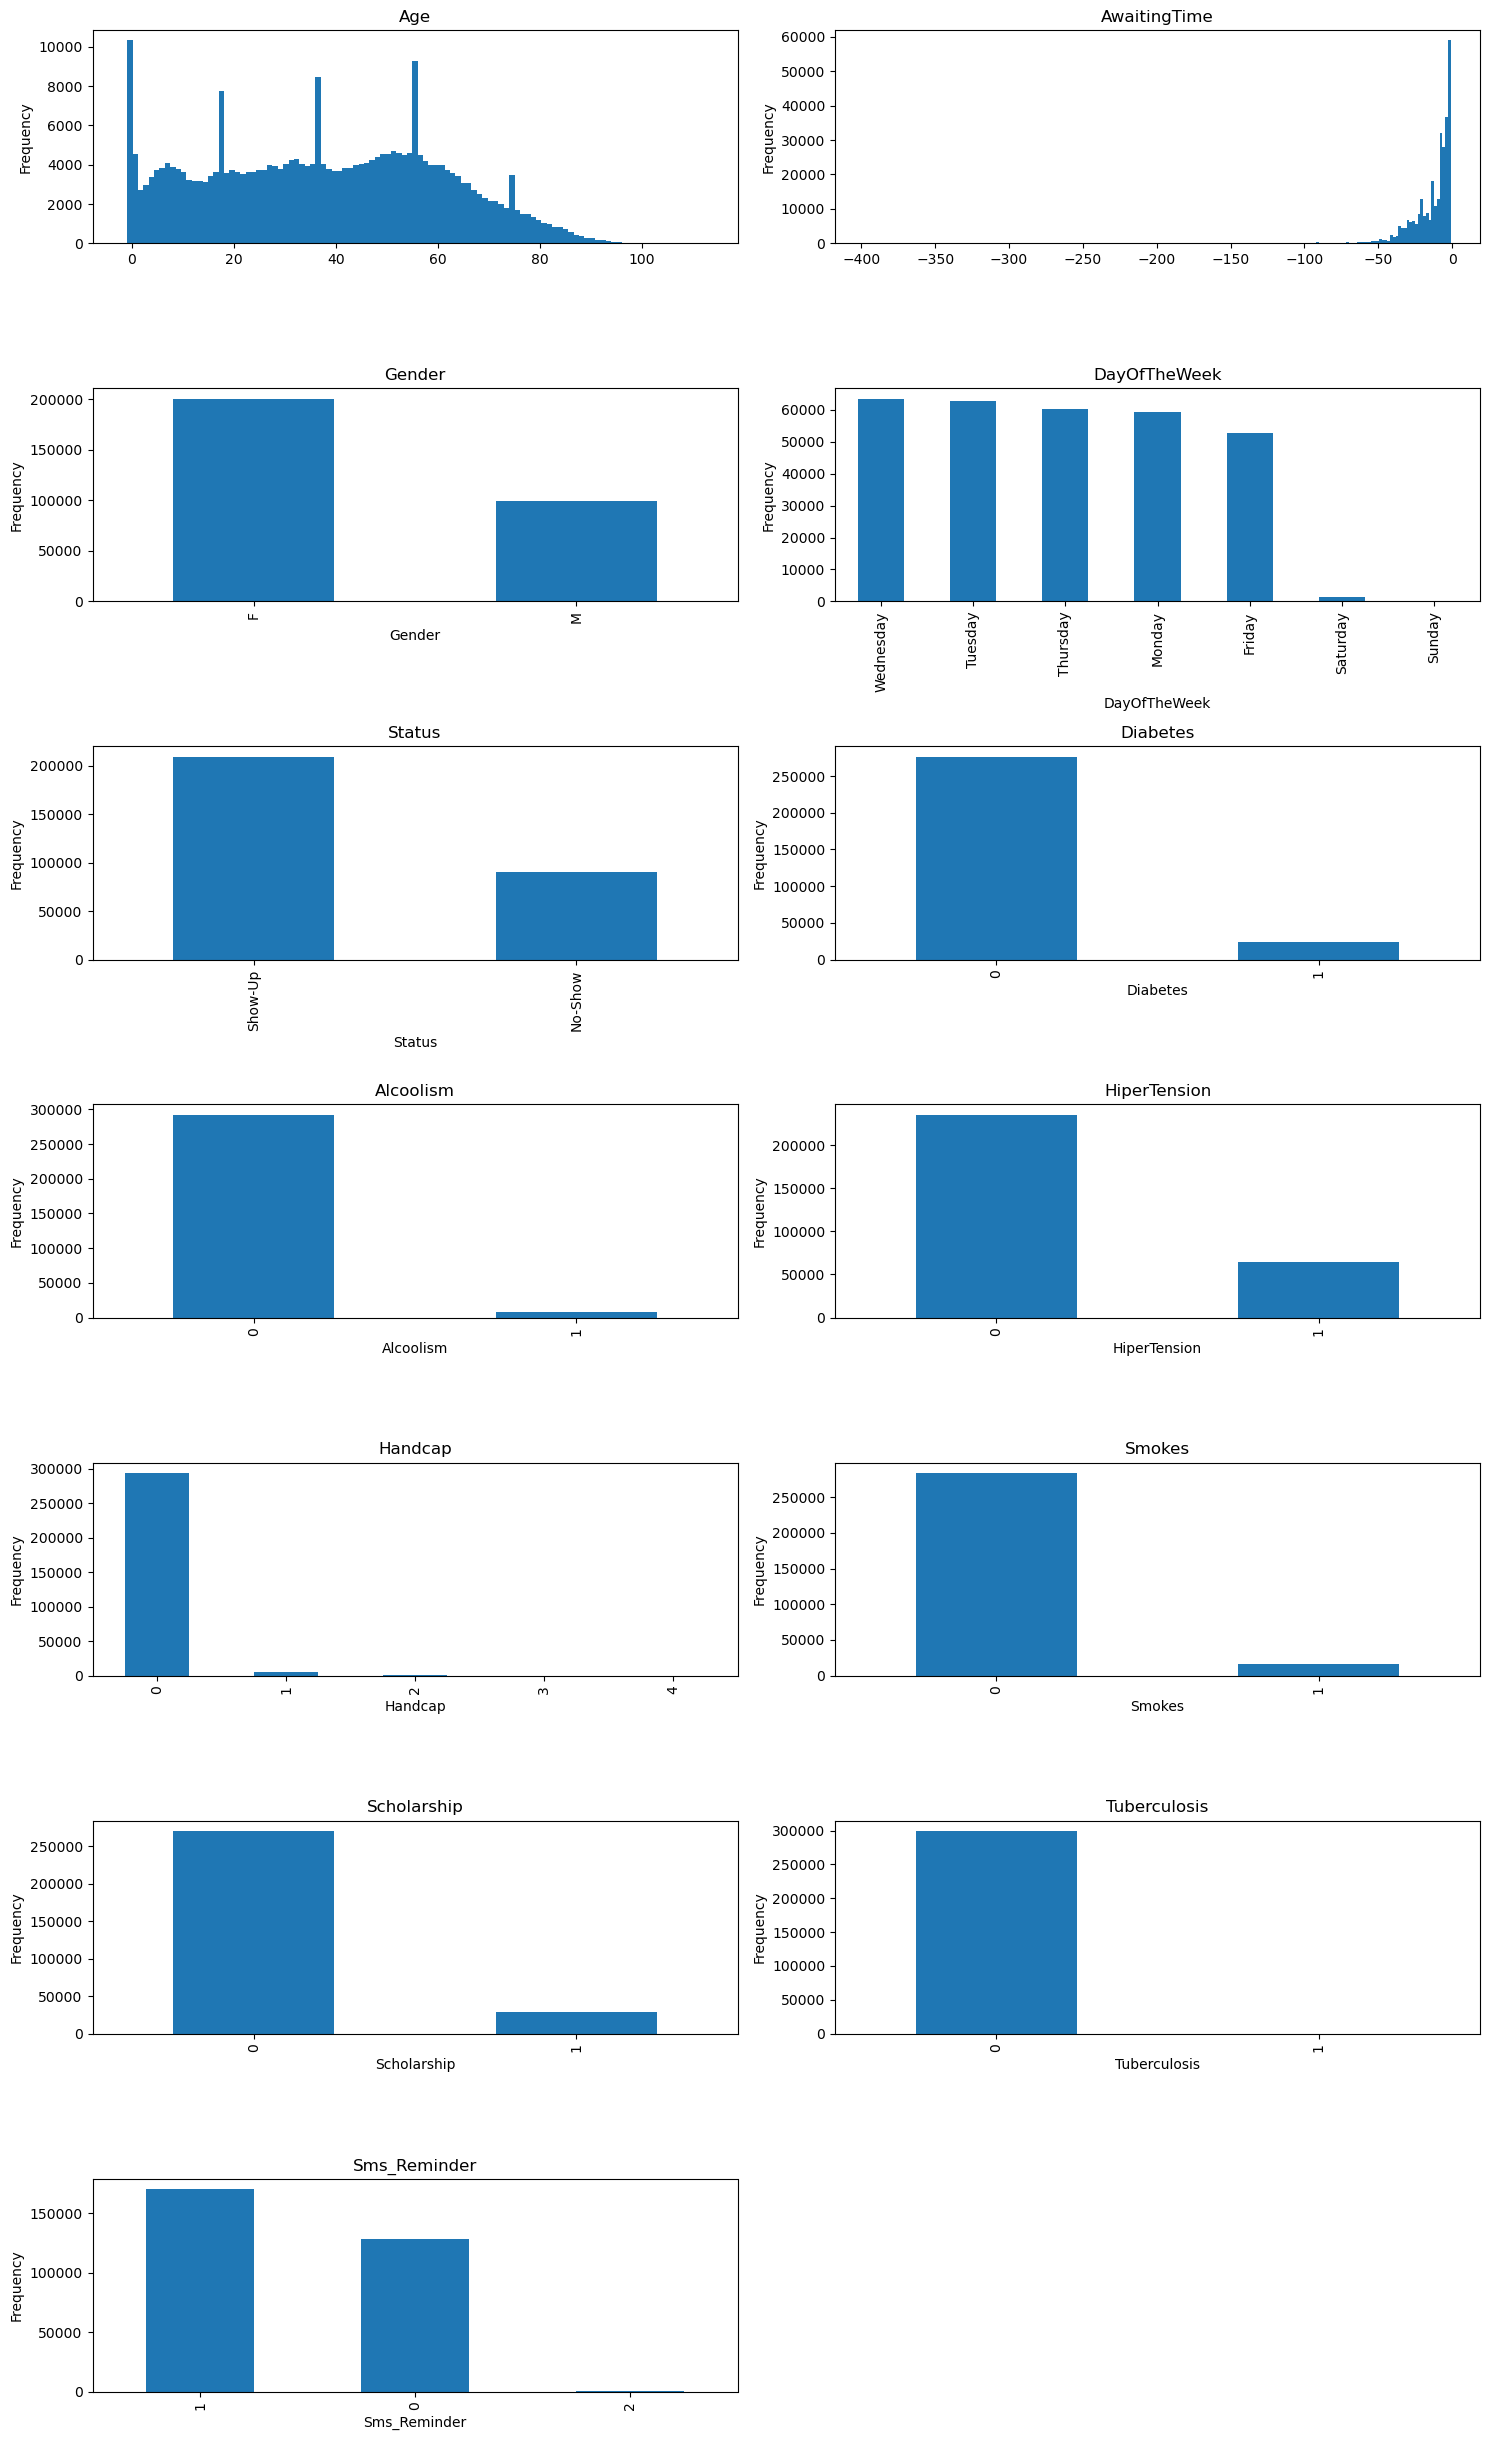

In [100]:
# write your code here:

features_plots([
    'Gender', 'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoolism',
    'HiperTension', 'Handcap', 'Smokes', 'Scholarship',
    'Tuberculosis', 'Sms_Reminder'
])


In [101]:
data['Sms_Reminder'].unique()
data['Age'].min()
# data['Age'].max()

-2

Dr. Judy made the following deductions about some of the features from the dataset :
Handicap: Instead of being Boolean, this feature had values in the range of 0 and 4.

Sms_Reminder: Instead of being a Boolean entity, it had values in the range of 0 and 2. It seemed to her that Sms_Reminder represented the frequency of reminders sent to each and every patient.

        6- Look a the Feature Representation plots,
        a. Does any feature has missing values? (1 point)
        b. Make some deductions about Age and AwaitingTime. (1 points)

#### Write your answer here:



a. There is no missing value in any of the feature because gender has F and M, Sms_reminder has values 0 to 2, handcap ranges from 0 to 4, weekdays has all 7 days, and all the other featues have values 0 and 1.

b. Some patients ages start from -2, which could be data error, while maximum value of  113 could be acceptable. Most of values seems to be between 0 to 60.
For awaiting time, values range from -50 to 0 which means that most of the patient scheduled their appoint within 100 days before the appointment.

Findings from the deductions meant that Dr.Judy would have to clean data a bit (i.e., perform data wrangling) before pushing it into the analysis pipeline.

### Performing Data Wrangling

        7-  Count Frequency of Negative Age Observations (1 point)

In [102]:
# write your code here:
data[data['Age'] < 0].shape
# 6 rows have negative age values


(6, 15)

        8- Remove Observations with Negative Age Values (1 point)

In [103]:
# write your code here:
data = data[data['Age'] >= 0]
data.shape

(299994, 15)

While looking at the deductions from Feature Representation plots, Dr. Judy also noticed that the feature named ‘Handicap’ was an integer variable rather than a Boolean variable one. She recalled that the data definition for this feature set was missing from the data source and hence open to multiple interpretations. The only rationale she could think of for values lying within the range of 0 and 4 was that this might be a numeric entity representing the frequency of times a patient has been handicapped. As the interpretation of this feature was ambiguous to her she decided to drop this feature from the dataset .

        9- Remove Variable Named ‘Handicap’ from the Dataset ( 1 point )

In [104]:
# write your code here:
data = data.drop('Handcap', axis=1)
data.head()


,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,1,-6


        10- Make Values Within AwaitingTime Positive

In [105]:
data['AwaitingTime'] = data['AwaitingTime'].apply(lambda x: abs(x))
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,1,15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,1,6


The treatment of features on the basis of Dr. Judy deductions was completed. However, she recalled reading that most machine learning algorithms work best with integer or floating point input rather than in string format. She knew that the categorical variables in the dataset didn’t comply with this condition and hence it was important for her to recode the string categorical features to their integer counterparts. Dr. Judy started off by recoding DayOfTheWeek by binding the mapping from string to integer.

        11- Recode String Categorical Feature DayOfTheWeek to Integers

In [106]:
dow_mapping = {'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4, 'Saturday' : 5, 'Sunday' : 6}
data['DayOfTheWeek'] = data['DayOfTheWeek'].map(dow_mapping)

In [107]:
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,2,Show-Up,0,0,0,0,0,0,0,29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,2,Show-Up,0,0,0,0,0,0,0,1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,1,Show-Up,0,0,0,0,0,0,0,1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,3,Show-Up,0,0,0,0,0,0,1,15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,1,Show-Up,0,0,0,0,0,0,1,6


Dr. Judy explained her recoding methodology as follows:

There exists methods for automatic recoding of categorical variables. These methods perform the recoding in an alphabetic order such that if categories for a feature are Male and Female, then it will assign a code of 0 to Female and 1 to Male. DayOfTheWeek is an ordinal quantity; hence I decided to do the mapping manually. However, this is not the case in the Gender and Status features as they are nominal in nature. Hence, I will be using the predefined method to do the recoding automatically .

Dr. Judy performed the recoding for ‘Gender’ and ‘Status’

        12- Recode String Categorical Features ('Gender', 'Status') to Integers using pands.Categorical method(). (1 point)

In [108]:
# write your code here:
data['Gender'] = pd.Categorical(data['Gender']).codes
data['Status'] = pd.Categorical(data['Status']).codes
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,1,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,2,1,0,0,0,0,0,0,0,29
1,24,0,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,2,1,0,0,0,0,0,0,0,1
2,4,0,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,1,1,0,0,0,0,0,0,0,1
3,5,1,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,3,1,0,0,0,0,0,0,1,15
4,38,1,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,1,1,0,0,0,0,0,0,1,6


### Performing Exploratory Data Analysis

Rather than starting off with the exploratory data analysis (EDA), Dr. Judy believed it best to see the data visually to identify if there were patterns to which she could redirect the model. Dr. Judy believed that as people got older, their need to see a doctor would also increase. The notion behind this was that as people age, diseases increase exponentially. Hence she wrote the a code in to see if the relationship between these quantities is inversely proportional in reality or not.

        13- Plot a Scatter Plot Between Age and AwaitingTime. (1 point)

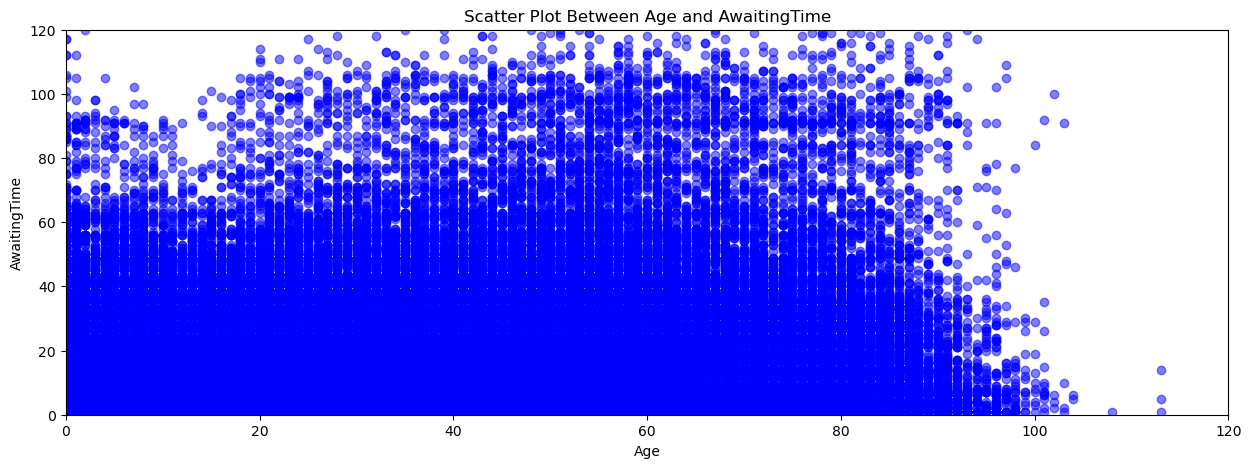

In [109]:
# Write your code here

plt.scatter(data['Age'], data['AwaitingTime'], alpha=0.5, color='blue')
plt.title('Scatter Plot Between Age and AwaitingTime')
plt.xlabel('Age')
plt.ylabel('AwaitingTime')
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.show()


Dr. Judy wasn’t happy with the results as Scatter Plot gave a highly dispersed plot, with no signs of correlation at the start and a bit of negative correlation after the age of 90. Visual representation showed the earlier established hypothesis to have failed. However, she decided to validate this using a statistical correlation technique as well

        14- Calculate Pearson Correlation Between Age and AwaitingTime

In [110]:
pd.set_option('display.width', 100)
pd.set_option('display.precision', 3)
correlations = data[['Age', 'AwaitingTime']].corr(method='pearson')
print(correlations)

                Age  AwaitingTime
Age           1.000        -0.004
AwaitingTime -0.004         1.000


The correlation between Age and AwaitingTime was approaching 0 which deferred to the hypothesis she had established earlier. She was now interested to see if the increase in SMS reminders increased the likelihood of a patient showing up or not. For that reason she wrote a code to plot a stacked bar graph.

        15- Show the effect on Status on the Basis of Number of SMS Reminders

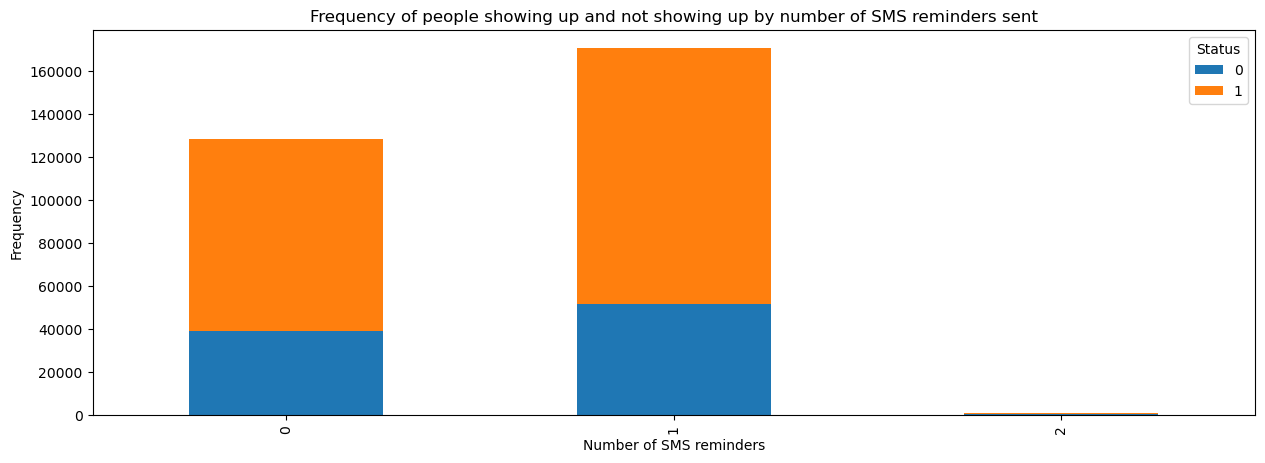

In [111]:
data_dow_status = data.groupby(['Sms_Reminder', 'Status'])['Sms_Reminder'].count().unstack('Status').fillna(0)
data_dow_status[[0, 1]].plot(kind='bar', stacked=True)
plt.title('Frequency of people showing up and not showing up by number of SMS reminders sent')
plt.xlabel('Number of SMS reminders')
plt.ylabel('Frequency')
plt.show()


Looking at above plot Dr. Judy noticed that the rate of change in the number of patients who showed up after one reminder relative to those who showed up when no reminder was sent was roughly 30% (i.e., (0.17 m – 0.13 m) / 0/13m), whereas the rate of change in the number of patients not showing up after one reminder relative to those who showed up when no reminder was sent was roughly 25% (i.e., (0.05 m – 0.04 m) / 0/04m0. She thus concluded that SMS reminders do marginally increase the likelihood of a patient showing up on his/her appointment day.

Dr. Judy’s perspective was that the majority of the patients would show up in the middle of a week, whereas many of them changed their plans and would not show up for an appointment at the start or the end of the week. This she believed was due to the fact that the start and the end of the week are usually the busiest for businesses, while relief in work occurs during the middle of a week. She decided to validate her perspective in a code.

        16- Show the effect on Appointment Day of the Week on the Basis of Number of SMS Reminders (1 points)

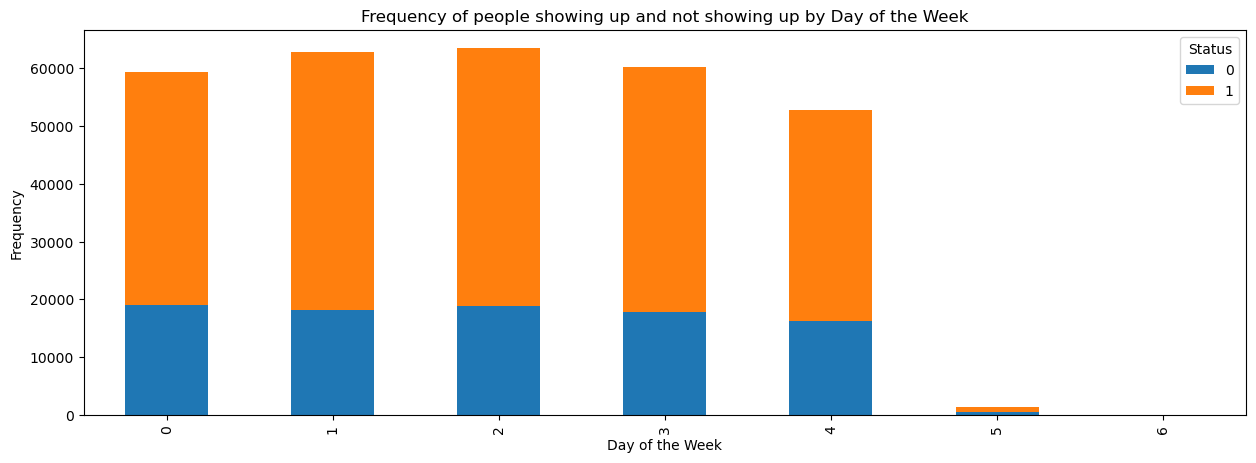

In [112]:
# Write your code here
data_dow_status = data.groupby(['DayOfTheWeek', 'Status'])['DayOfTheWeek'].count().unstack('Status').fillna(0)
data_dow_status[[0, 1]].plot(kind='bar', stacked=True)
plt.title('Frequency of people showing up and not showing up by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.show()



Dr. Judy pointed out that in above plot, 0 represents Monday whereas 6 represents Sunday, with rest of the days lying within in order. Close to no patients showed up on Saturdays, and the clinic was closed on Sundays. The rate of change of no-shows stayed pretty much the same for the remaining five days, whereas the distribution of show-ups seemed to have followed a bell-shaped curve, with most patients showing up on Wednesdays.

Dr. Judy believed that people who are younger are more likely to be busy and to have a job. Because of that they might be short of time and highly likely to not show up at the time of their appointment. She initially thought of finding the measure of center (i.e., mean or median) to validate her hypothesis. However, she wasn’t sure which one of the center of measures she should go forward with (i.e., mean, median, or mode).

She recalled from Feature Representation plots that a huge chunk of observations in Age have a value of 0. This she knew could turn out into a disadvantage while calculating the mean as then it will pull the mean toward the lower side. Hence she believed a better measure to be the median, which is unaffected by outliers. Thus she planned on plotting a box plot of Age grouped by Status.

        17- Plot Box Plot of Patients’ Age by Status ( 1 point)

<Figure size 800x600 with 0 Axes>

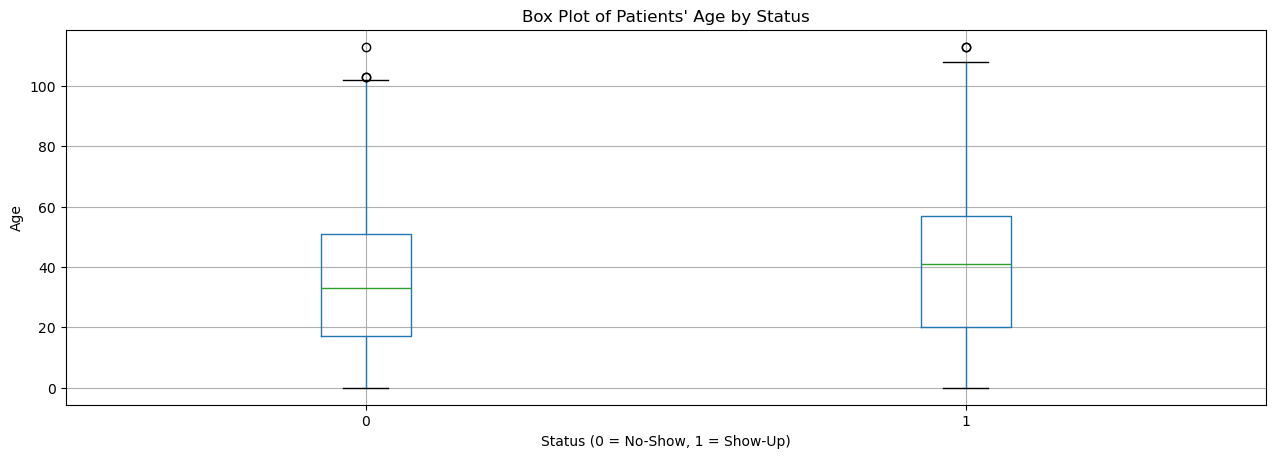

In [113]:
# Write your code here
plt.figure(figsize=(8, 6))
data.boxplot(column='Age', by='Status')
plt.title("Box Plot of Patients' Age by Status")
plt.suptitle('')  
plt.xlabel('Status (0 = No-Show, 1 = Show-Up)')
plt.ylabel('Age')
plt.show()



She was thrilled to see the results in box plot as her hypothesis held true as the median age of people showing up (i.e., 40) turned out to be relatively greater than that of those not showing up (i.e., 32). She also pointed to the fact that the upper limit (i.e., quartile 3) of people showing up is 58, which is relatively higher than that of those of not showing up (i.e., 52).

Dr. Judy decided to analyze Age against Status for both genders separately. For that reason she wrote the code below to plot line graphs.

        18- Plot Line Plot of Age by Gender for Patients Status-Wise


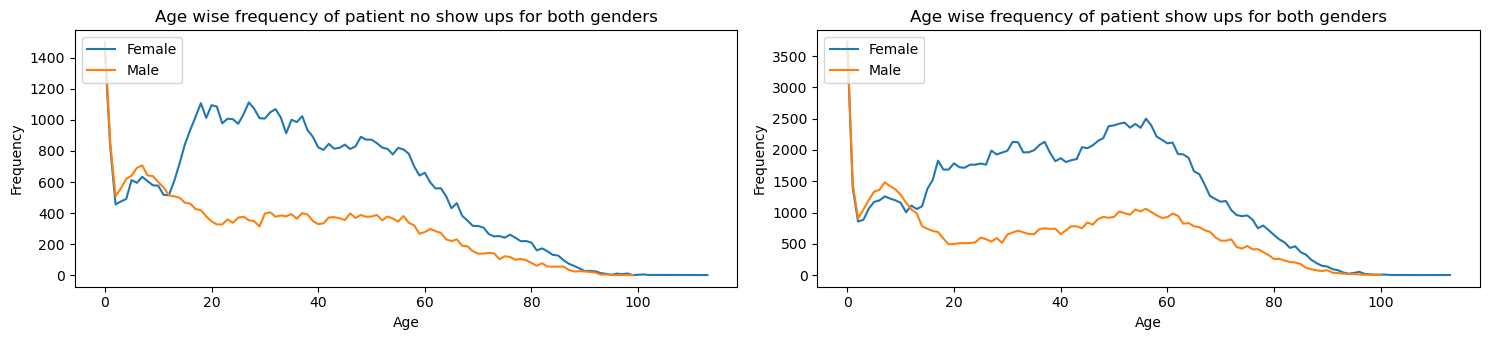

In [114]:
plt.figure(figsize=(15,3.5))

for i, status in enumerate(['no show ups', 'show ups']):

    data_show = data[data['Status']==i]
    plt.subplot(1, 2, i+1)

    for gender in [0, 1]:
        data_gender = data_show[data_show['Gender']==gender]
        freq_age = data_gender['Age'].value_counts().sort_index()
        freq_age.plot()

    plt.title('Age wise frequency of patient %s for both genders'%status)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend(['Female', 'Male'], loc='upper left')
plt.tight_layout()
plt.show()

Age pattern for males seems to be similar for both statuses, contrary to that of females which varies across statuses. Females in the age range of 42 to 62 are likely to show up on the date and time of their appointment.

Dr. Judy believed that people having a long AwaitingTime (i.e., days to appointment) would have preferred to see another doctor rather than waiting so long. She believed that another reason for not showing up on the appointment date could be that if a disease is seasonal it is likely to be cured after some prevention techniques or home-based remedies. Hence, by the time their appointment date arrives, the patients decide not to consult the doctor. She decided to see if this was true from the data at hand.

        19- Plot Box Plot of AwaitingTime by Status (1 point)

<Figure size 800x600 with 0 Axes>

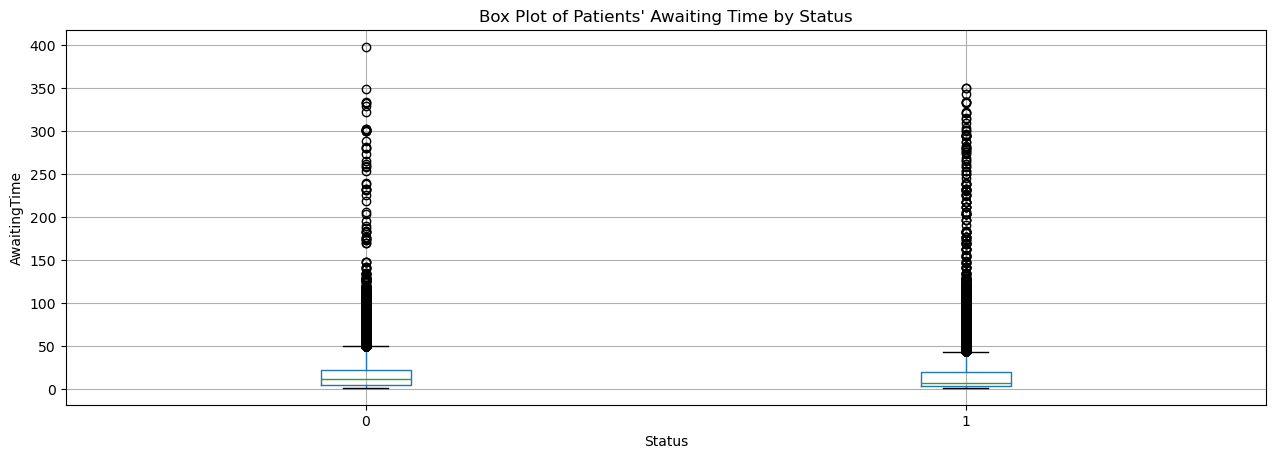

In [ ]:
plt.figure(figsize=(8, 6))
data.boxplot(column='AwaitingTime', by='Status')
plt.title("Box Plot of Patients' Awaiting Time by Status")
plt.suptitle('') 
plt.xlabel('Status')
plt.ylabel('AwaitingTime')
plt.show()


After looking at above box plot, Dr. Judy deduced that patients who have their AwaitingTime in the third quartile are relatively more likely to not to show up, which supported her earlier laid null hypothesis—with increasing waiting time the likelihood of patient not showing up also increases. She also pointed out that the median in both the status instances is close to zero.

Dr. Judy was thrilled as exploratory data analysis provided her with many insights. Summing up, she observed that SMS reminders increased the likelihood of a patient showing up on time. She also noticed that younger patients more often did not show up at their appointment times whereas older patients were more disciplined and showed up on time. She also saw that people with long waiting times decided not to show up on their appointed date and times. Dr. Judy now had a fair idea that no-shows to appointment was the reason for losses, and she had gained insight into what leads people to exhibit this behavior. Now she was planning to move ahead and make a classification model to predict the likelihood of a patient to show up or not in the future. This was important because if she knew the total number of patients who would show up on a given day, week, or month, she could tune the resources likewise to save costs. However, before starting with this classification, she wondered whether she could extract more features out of the existing ones by means of features’ generation. She believed this would help her capture the variability and definite patterns within the dataset

### Features’ Generation

In machine learning, the greater the number of observations and feature sets within the dataset, the greater the likelihood that the model will capture the variability within it, to understand its true essence. Dr. Judy knew that increasing the number of observations was not an option; however, she could increase the feature sets within the dataset. Dr. Judy was clueless as to how she could extract more features from the existing features. After much thinking, she decided to break the features having dates into more granular date components. She wrote the code below cell to apply her logic to features named AppointmentRegistration and AppointmentDate.

        20-Breaking Date Features into Date Components

In [116]:
for col in ['AppointmentRegistration', 'ApointmentData']:
    for index, component in enumerate(['year', 'month', 'day']):
        data['%s_%s'%(col, component)] = data[col].apply(lambda x: int(x.split('T')[0].split('-')[index]))

Dr. Judy explained that the above code broke AppointmentRegistration and AppointmentData features into their respective year, month, and day components. However, it didn’t break them into their time components because ApointmentData doesn’t have a time component within its string object, whereas AppointmentRegistration feature does have it. Hence she wrote a code to break the AppointmentRegistration feature into its time component as well.

        21- Breaking AppointmentRegistration into Time Components

In [117]:
for index, component in enumerate(['hour', 'min', 'sec']):
    data['%s_%s'%('AppointmentRegistration', component)] = data['AppointmentRegistration'].apply(
       lambda x: int(x.split('T')[1][:-1].split(':')[index]))

To witness the step of features generation, she print Observations of the Dataset

In [118]:
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Smokes,...,AwaitingTime,AppointmentRegistration_year,AppointmentRegistration_month,AppointmentRegistration_day,ApointmentData_year,ApointmentData_month,ApointmentData_day,AppointmentRegistration_hour,AppointmentRegistration_min,AppointmentRegistration_sec
0,19,1,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,2,1,0,0,0,0,...,29,2014,12,16,2015,1,14,14,46,25
1,24,0,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,2,1,0,0,0,0,...,1,2015,8,18,2015,8,19,7,1,26
2,4,0,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,1,1,0,0,0,0,...,1,2014,2,17,2014,2,18,12,53,46
3,5,1,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,3,1,0,0,0,0,...,15,2014,7,23,2014,8,7,17,2,11
4,38,1,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,1,1,0,0,0,0,...,6,2015,10,21,2015,10,27,15,20,9


Looking at above Table Dr. Judy was thrilled to see the features’ generation come true. The evidence was the columns representing the year, month, day, hour, minute, and second components of AppointmentData and AppointmentRegistration. Dr. Judy was well aware that her methodology of increasing the feature sets wasn’t the de facto technique as several other techniques achieving the same objective exist. She had some ideas about extracting more features; however, she went with the simplest one to save time. But she is open to collaboration if someone can help her extract other date components from the date features or help her transform the features into their Boolean counterparts.

 Dr. Judy was hopeful that this pool of features would now enable the classification model to better understand the dynamics of the underlying data. She was aware of what classification was, but her curiousity to learn more made her come up with the following material on the topic.

### Classification

Dr. Judy decided to define a method that would take the actual data and predict the goodness of the model. For that reason she wrote the following method:

In [119]:
def model_performance(model_name, model, X_train, y_train, y_test, Y_pred):

    print('Model name: %s'%model_name)
    print('Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_test, Y_pred))
    print('Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_test, Y_pred))
    print('Train accuracy: %f'%model.score(X_train, y_train))

    fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, Y_pred)
    print('Area Under the Precision-Recall Curve: %f'%metrics.auc(fpr, tpr))

    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, Y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In order to cross-validate the model, Dr. Judy knew that she would have to split the data into training and testing data.

Dr. Judy planned to train the model from the training dataset and then use that model to predict the values in the test dataset. She planned on doing so to determine the goodness of the model. She wrote the code for the training/testing split

In [120]:
# Declaring Features for Model Training:
features_of_choice = [u'Age', u'Gender', 'DayOfTheWeek', 'Diabetes', 'Alcoolism', 'HiperTension',
                        'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
                        'AwaitingTime', 'AppointmentRegistration_year', 'AppointmentRegistration_month',
                        'AppointmentRegistration_day', 'ApointmentData_year', 'ApointmentData_month',
                        'ApointmentData_day', 'AppointmentRegistration_hour', 'AppointmentRegistration_min',
                        'AppointmentRegistration_sec']

x = np.array(data[features_of_choice])
y = np.array(data['Status'])

        22- Split Data ( x and y ) into Training and Testing Sets ( 1 point)
        train the model with 70% of the samples and test with the remaining 30%.

In [121]:
# write your code here:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

Dr. Judy explained her logic. She took a 70-30 split whereby 70% of the observations fall into training and 30% of observations fall into the test dataset.

Before applying the classification model she thought it better to recall the reason for doing classification in the first place. With the aid of the exploratory analysis she had figured out the reason for recurring losses. Then she decided to go a further mile to find a remedy for this problem. She decided to use classification as an aid to predict if a patient will show up on his/her appointment day or not. This would enable management to do either of the following:

Scale down the human resources (i.e., staff and doctors) to cut costs

Determine the reasons for patients not showing up and find fixes for that problem

While looking at classification, the only visual representation Dr. Judy could think of was a tree. As in the case of Status, the tree will have one parent node and two child nodes (i.e., show-ups and no-shows). While searching for classification models, she found a visual representation, Decision Tree Classification.

#### Decision Tree Classification

Dr. Judy wrote a code to train the decision tree classification model on a training dataset. She used the test-train split variables.

        23- Training the Model by Applying Decision Tree Classifier (1 point)

In [122]:
# write your code here
dt_classifier = DecisionTreeClassifier(
	random_state=42,
    max_depth=8,              
    min_samples_split=50,     
    min_samples_leaf=25,     
    class_weight='balanced'   
)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=25, min_samples_split=50,
                       random_state=42)

Dr. Judy pointed out that because no configuration parameters were passed to the decision tree classifier, it took the default values of configuration parameters. The next step was to apply the trained model on a testing dataset to find the predicted labels of Status. She then aimed to compare the predicted labels to the original label of Status to calculate accuracy of the model.

        24- Predict labels of Status by applying the trained model on a testing dataset ( 1 point)

In [123]:
# write your code here:
y_pred = dt_classifier.predict(X_test)

        25- Finding the performance of Decision Tree Classifier using the predefined model_performance method (1 point)

Model name: Decision Tree Classifier
Test accuracy (Accuracy Score): 0.567129
Test accuracy (ROC AUC Score): 0.573810
Train accuracy: 0.574499
Area Under the Precision-Recall Curve: 0.115097


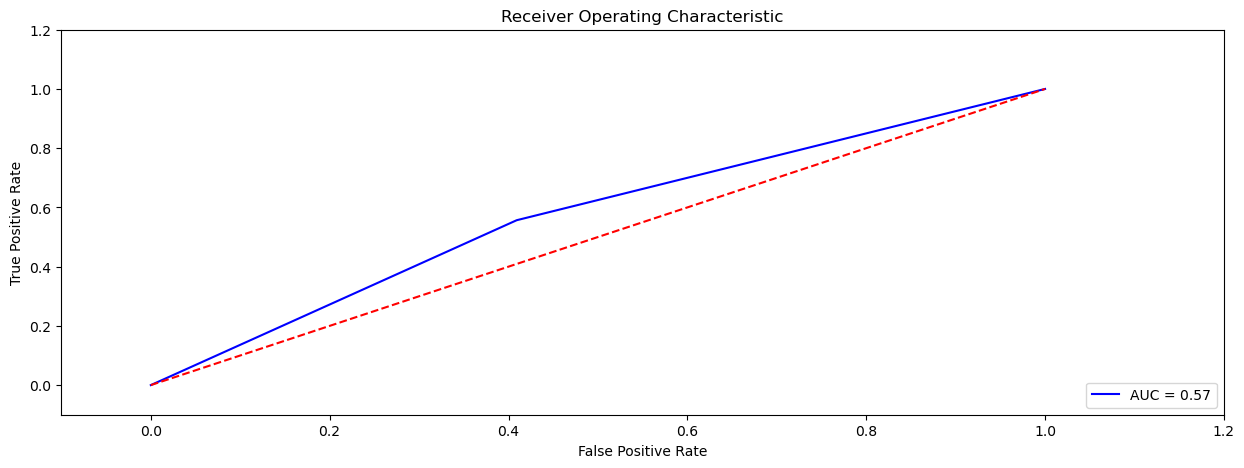

In [124]:
# write your code here:
model_performance("Decision Tree Classifier", dt_classifier, X_train, y_train, y_test, y_pred)

#### Ensemble Methods:
##### Random Forest Classification

        26- Training RandomForest (RF) Classifier on Training Dataset (1 point)



In [125]:
# write your code here
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,                 
    min_samples_split=50,         
    min_samples_leaf=25, 
    random_state=42,
    class_weight='balanced_subsample',
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       min_samples_leaf=25, min_samples_split=50,
                       n_estimators=500, n_jobs=-1, random_state=42)

        27- Predict labels of Status by applying the RF trained model on a testing dataset ( 1 point)

In [126]:
# write your code here
y_pred_rf = rf.predict(X_test)

         28- Finding the performance of RF Classifier using the predefined model_performance method (1 point)

Model name: Random Forest Classifier
Test accuracy (Accuracy Score): 0.577018
Test accuracy (ROC AUC Score): 0.578266
Train accuracy: 0.592200
Area Under the Precision-Recall Curve: 0.118763


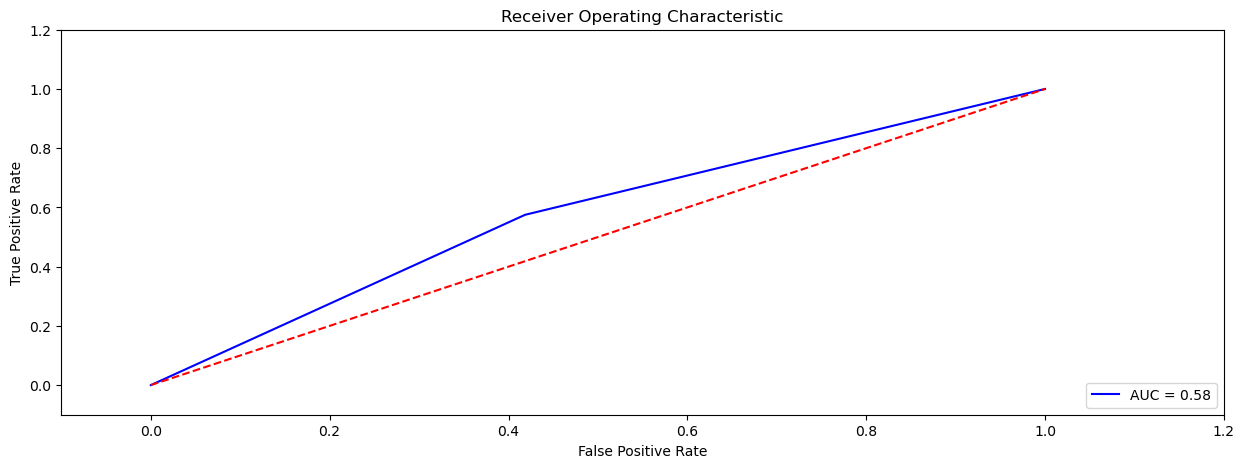

In [127]:
# write your code here

model_performance("Random Forest Classifier", rf, X_train, y_train, y_test, y_pred_rf)

##### Gradient Boosting (GB)


        29- Training GB Classifier on Training Dataset ( 1 point)


In [128]:
# write your code here
gb = GradientBoostingClassifier(
    n_estimators=400,              
    max_depth=3,                   
    min_samples_split=50,
    min_samples_leaf=25,
random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(min_samples_leaf=25, min_samples_split=50,
                           n_estimators=400, random_state=42)

        30- Predict labels of Status by applying the GB trained model on a testing dataset ( 1 point)

In [129]:
# write your code here:
y_pred_gb = gb.predict(X_test)

       31- Finding the performance of GB Classifier using the predefined model_performance method (1 point)

Model name: Gradient Boosting Classifier
Test accuracy (Accuracy Score): 0.699541
Test accuracy (ROC AUC Score): 0.512718
Train accuracy: 0.703383
Area Under the Precision-Recall Curve: 0.153014


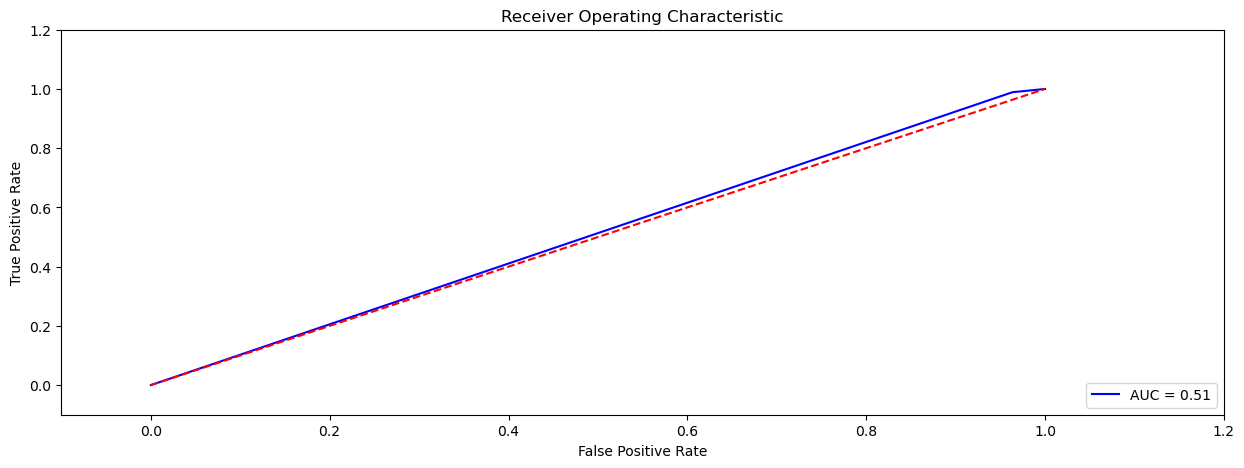

In [130]:
# write your code here:
model_performance("Gradient Boosting Classifier", gb, X_train, y_train, y_test, y_pred_gb)

        32- What do you observe about the performance of DT, RF, and GB models? (2 points)

#### Write your answer here
All three model like Decision Tree, Random Forest and Gradient Boosting didn’t perform good, their AUC score was around 0.5 only. It means they can’t really tell good between who showed up and who didn’t. The Decision Tree overfitted the train data and Random Forest and Gradient Boosting was a little bit better but still not very accurate. Maybe the data is not clean or too small or something wrong with features so model didn’t learn pattern well.

        33- What can be applied to improve the model performance? (2 points)

#### Write your answer here:
To make the model better, we can try cross validation or change some parameter like max depth or min sample split. Using GridSearchCV is also help to find best one. I can also add more features or delete some bad one, and fix missing value and imbalance data. Sometimes model not perform good because of wrong split or not enough training data, so I can try to get more data and tune learning rate or n_estimator to improve result.